In [556]:
import mne

In [557]:
left_raw = mne.io.read_raw_fif('LEFT.fif', preload=True)
right_raw=mne.io.read_raw_fif('RIGHT.fif', preload=True)


Opening raw data file LEFT.fif...
Isotrak not found
    Range : 0 ... 10527 =      0.000 ...    82.242 secs
Ready.
Reading 0 ... 10527  =      0.000 ...    82.242 secs...
Opening raw data file RIGHT.fif...
Isotrak not found
    Range : 0 ... 16255 =      0.000 ...   126.992 secs
Ready.
Reading 0 ... 16255  =      0.000 ...   126.992 secs...


/tmp/ipykernel_58107/3220326408.py:1: RuntimeWarning: This filename (LEFT.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  left_raw = mne.io.read_raw_fif('LEFT.fif', preload=True)
/tmp/ipykernel_58107/3220326408.py:2: RuntimeWarning: This filename (RIGHT.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  right_raw=mne.io.read_raw_fif('RIGHT.fif', preload=True)


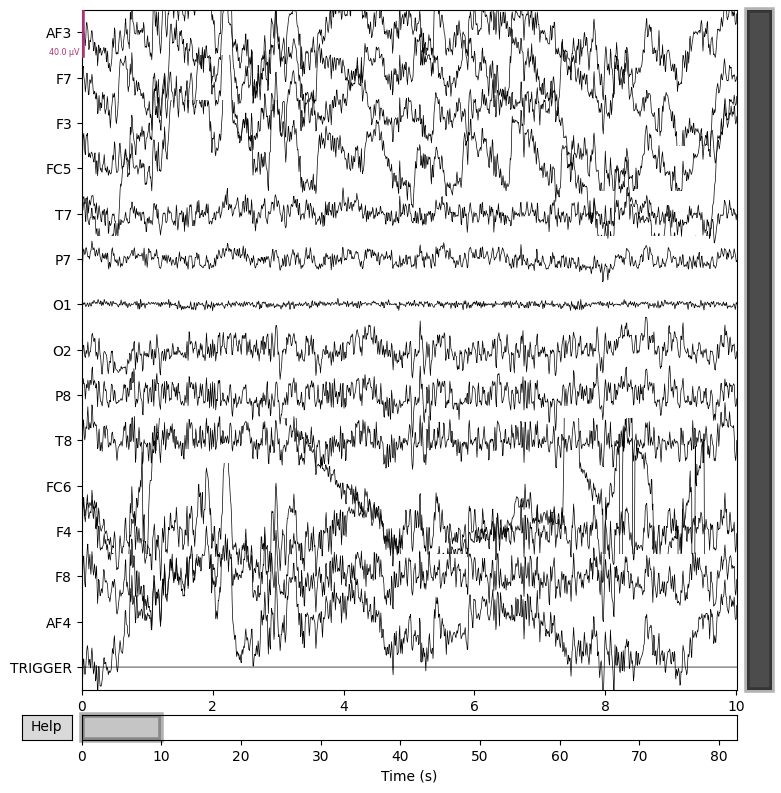

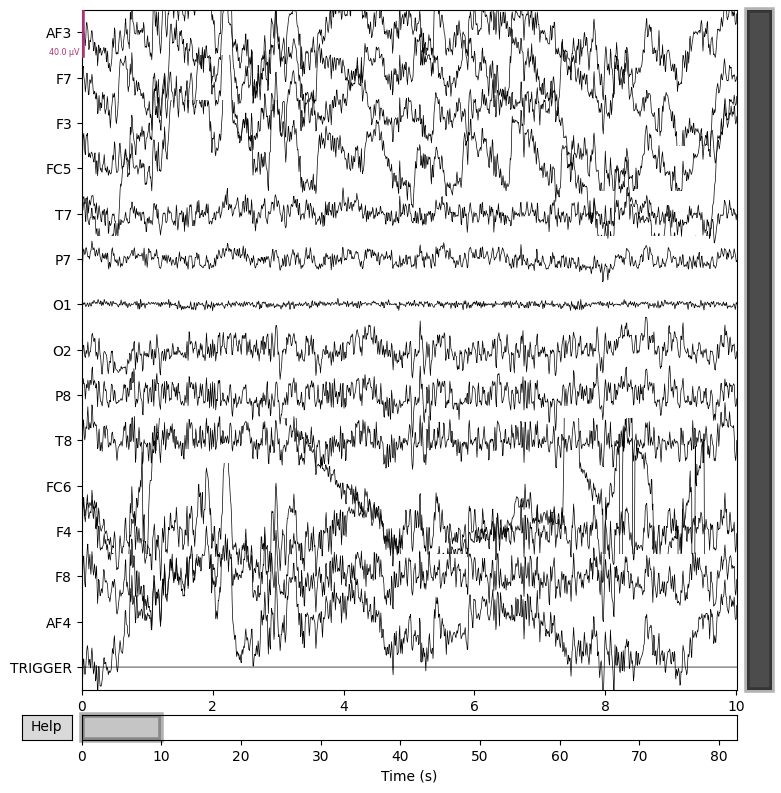

In [558]:
left_raw.plot()

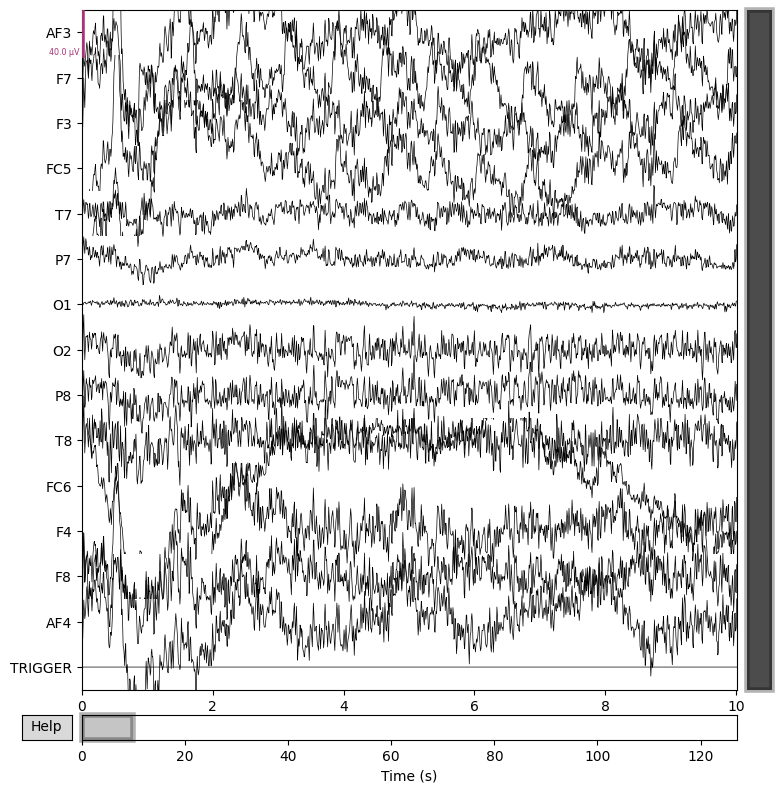

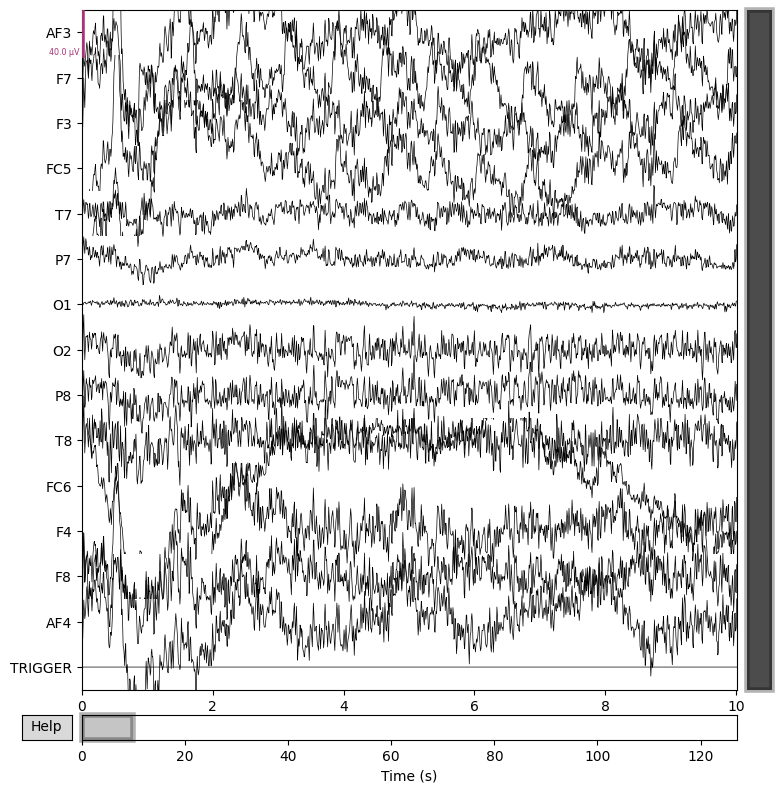

In [559]:
right_raw.plot()

In [560]:
print(right_raw.info)
print(left_raw.info)

<Info | 9 non-empty values
 bads: []
 ch_names: TRIGGER, AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 1 Stimulus, 14 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 15
 projs: []
 sfreq: 128.0 Hz
>
<Info | 9 non-empty values
 bads: []
 ch_names: TRIGGER, AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 1 Stimulus, 14 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 15
 projs: []
 sfreq: 128.0 Hz
>


In [561]:
# from mne.preprocessing import ICA

SKIP FROM HERE

In [562]:
from sklearn.preprocessing import StandardScaler
right_eeg = right_raw.get_data()
left_eeg = left_raw.get_data()

scaler = StandardScaler()
right_eeg_normalized = scaler.fit_transform(right_eeg)
left_eeg_normalized = scaler.fit_transform(left_eeg)

In [563]:
import numpy as np
min_length = min(right_eeg_normalized.shape[1], left_eeg_normalized.shape[1])

right_eeg_trimmed = right_eeg_normalized[:, :min_length]
left_eeg_trimmed = left_eeg_normalized[:, :min_length]

X = np.concatenate((right_eeg_trimmed, left_eeg_trimmed), axis=0)
y = np.concatenate((right_labels[:right_eeg_trimmed.shape[0]], left_labels[:left_eeg_trimmed.shape[0]]), axis=0)


In [564]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [565]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

predictions = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")
    
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       2.0
         1.0       0.00      0.00      0.00       4.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



In [566]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 50.00%
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.40      1.00      0.57         2
         1.0       1.00      0.25      0.40         4

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



In [567]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)

logreg_classifier.fit(X_train, y_train)

logreg_predictions = logreg_classifier.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy * 100:.2f}%")

print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))


Logistic Regression Accuracy: 0.00%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       2.0
         1.0       0.00      0.00      0.00       4.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0



In [568]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))


KNN Accuracy: 16.67%
KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.33      0.25      0.29         4

    accuracy                           0.17         6
   macro avg       0.17      0.12      0.14         6
weighted avg       0.22      0.17      0.19         6



UPTO HERE

ab features extract krenge aur final classification me as feature use krenge
1)PSD
2)Wavelet Transform
3)Stats
4)Freq-Time Representation

1)PSD : har channel ka PSD nikala usse list me dala uski np array bnayi,np array islie kyuki list me sare features concatenate krne hai baki np array me hai

In [569]:
import numpy as np
from scipy.signal import welch

left_raw_channels = left_raw.get_data()  
right_raw_channels = right_raw.get_data()  
left_psd_features = []
for channel_data in left_raw_channels:  
    freqs, psd = welch(channel_data, fs=128)  
    left_psd_features.append(psd)  

right_psd_features = []
for channel_data in right_raw_channels:  
    freqs, psd = welch(channel_data, fs=128)  
    right_psd_features.append(psd)  



In [570]:
left_psd_features_np = np.array(left_psd_features)
right_psd_features_np = np.array(right_psd_features)


visualizing PSD of F7 Channel of left data

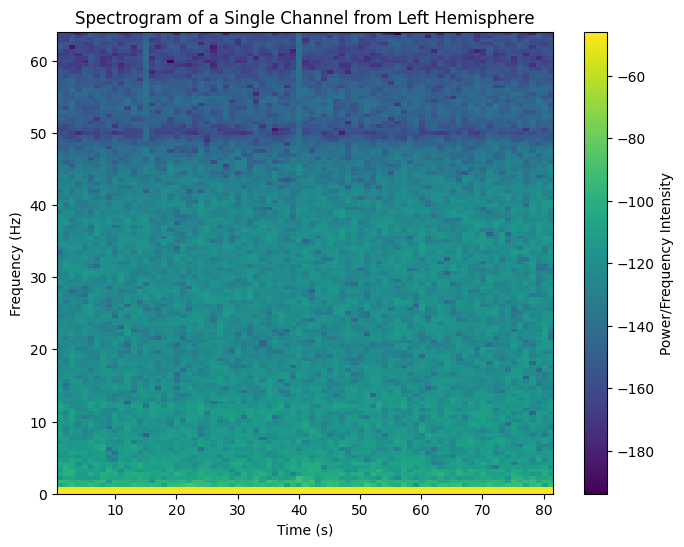

In [571]:
import matplotlib.pyplot as plt


left_channel_data = left_raw.get_data(picks='F7') 
left_channel_data = left_channel_data.squeeze()  
plt.figure(figsize=(8, 6))
plt.specgram(left_channel_data, Fs=128, cmap='viridis') 
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of a Single Channel from Left Hemisphere')
plt.colorbar(label='Power/Frequency Intensity')
plt.show()




2)ab Wavelet Transform lenge jisko as feature use krenge

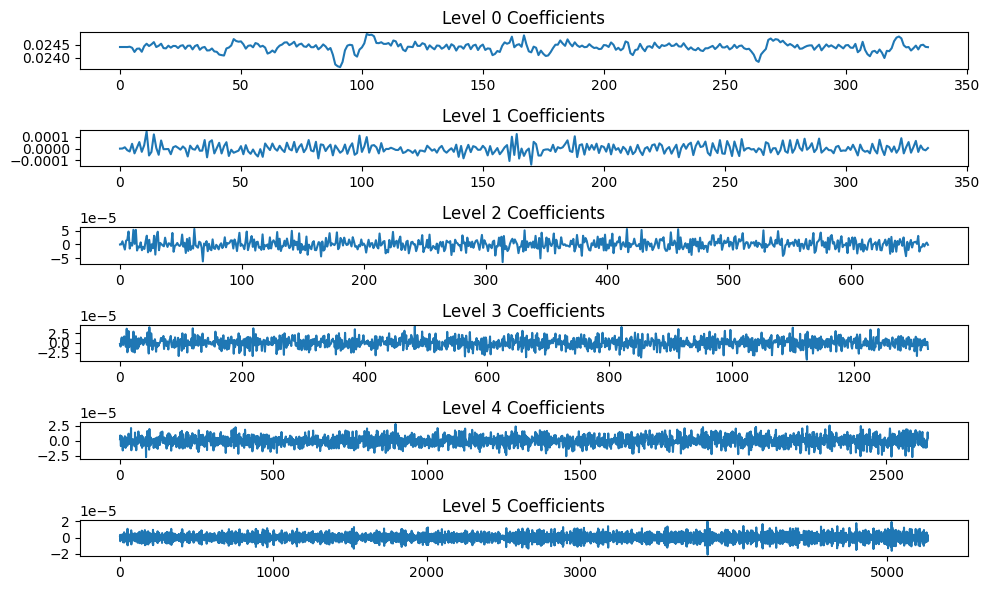

In [572]:
import pywt
import matplotlib.pyplot as plt

left_channel_data = left_raw.get_data(picks='F7')  
left_channel_data2 = left_channel_data.squeeze()  

coeffs = pywt.wavedec(left_channel_data2, 'db4', level=5)  

# coeffs = pywt.wavedec(, 'db4', level=5)  
plt.figure(figsize=(10, 6))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Level {i} Coefficients')
plt.tight_layout()
plt.show()


In [573]:
import pywt
import numpy as np

channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'TRIGGER']
all_channel_coeffs = {}

for channel in channel_names:
    channel_data = left_raw.get_data(picks=channel)
    channel_data = channel_data.squeeze()
    coeffs = pywt.wavedec(channel_data, 'db4', level=5)
    
    all_channel_coeffs[channel] = coeffs[0]

num_channels = len(channel_names)
max_coeff_length = max(len(coeff) for coeff in all_channel_coeffs.values())
num_levels = 1  

coefficients_array = np.zeros((num_channels * num_levels, max_coeff_length))

for i, channel in enumerate(channel_names):
    coeff = all_channel_coeffs[channel]

    padded_coeff = np.pad(coeff, (0, max_coeff_length - len(coeff)), mode='constant')
    coefficients_array[i * num_levels, :] = padded_coeff[:max_coeff_length]

print(coefficients_array.shape)



(15, 335)


In [574]:
import pywt
import numpy as np

channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'TRIGGER']
all_channel_coeffs_left = {}
all_channel_coeffs_right = {}

for channel in channel_names:
    channel_data_left = left_raw.get_data(picks=channel)
    channel_data_left = channel_data_left.squeeze()
    coeffs_left = pywt.wavedec(channel_data_left, 'db4', level=5)
    all_channel_coeffs_left[channel] = coeffs_left[0]
    
    channel_data_right = right_raw.get_data(picks=channel)
    channel_data_right = channel_data_right.squeeze()
    coeffs_right = pywt.wavedec(channel_data_right, 'db4', level=5)
    all_channel_coeffs_right[channel] = coeffs_right[0]

num_channels = len(channel_names)
max_coeff_length_left = max(len(coeff) for coeff in all_channel_coeffs_left.values())
max_coeff_length_right = max(len(coeff) for coeff in all_channel_coeffs_right.values())
num_levels = 1  

coefficients_array_left = np.zeros((num_channels * num_levels, max_coeff_length_left))
coefficients_array_right = np.zeros((num_channels * num_levels, max_coeff_length_right))

for i, channel in enumerate(channel_names):
    coeff_left = all_channel_coeffs_left[channel]
    coeff_right = all_channel_coeffs_right[channel]

    padded_coeff_left = np.pad(coeff_left, (0, max_coeff_length_left - len(coeff_left)), mode='constant')
    padded_coeff_right = np.pad(coeff_right, (0, max_coeff_length_right - len(coeff_right)), mode='constant')
    
    coefficients_array_left[i * num_levels, :] = padded_coeff_left[:max_coeff_length_left]
    coefficients_array_right[i * num_levels, :] = padded_coeff_right[:max_coeff_length_right]

print(coefficients_array_left.shape)
print(coefficients_array_right.shape)



(15, 335)
(15, 514)


In [575]:
import pywt
import numpy as np

channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'TRIGGER']
all_channel_coeffs_left_second = {}
all_channel_coeffs_right_second = {}

for channel in channel_names:
    channel_data_left = left_raw.get_data(picks=channel)
    channel_data_left = channel_data_left.squeeze()
    coeffs_left = pywt.wavedec(channel_data_left, 'db4', level=5)
    all_channel_coeffs_left_second[channel] = coeffs_left[1]  # Using index 1 for the second coefficient
    
    channel_data_right = right_raw.get_data(picks=channel)
    channel_data_right = channel_data_right.squeeze()
    coeffs_right = pywt.wavedec(channel_data_right, 'db4', level=5)
    all_channel_coeffs_right_second[channel] = coeffs_right[1]  # Using index 1 for the second coefficient

num_channels = len(channel_names)
max_coeff_length_left_second = max(len(coeff) for coeff in all_channel_coeffs_left_second.values())
max_coeff_length_right_second = max(len(coeff) for coeff in all_channel_coeffs_right_second.values())
num_levels = 1  

coefficients_array_left_second = np.zeros((num_channels * num_levels, max_coeff_length_left_second))
coefficients_array_right_second = np.zeros((num_channels * num_levels, max_coeff_length_right_second))

for i, channel in enumerate(channel_names):
    coeff_left = all_channel_coeffs_left_second[channel]
    coeff_right = all_channel_coeffs_right_second[channel]

    padded_coeff_left = np.pad(coeff_left, (0, max_coeff_length_left_second - len(coeff_left)), mode='constant')
    padded_coeff_right = np.pad(coeff_right, (0, max_coeff_length_right_second - len(coeff_right)), mode='constant')
    
    coefficients_array_left_second[i * num_levels, :] = padded_coeff_left[:max_coeff_length_left_second]
    coefficients_array_right_second[i * num_levels, :] = padded_coeff_right[:max_coeff_length_right_second]

print(coefficients_array_left_second.shape)
print(coefficients_array_right_second.shape)



(15, 335)
(15, 514)


In [576]:
import pywt
import numpy as np

channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'TRIGGER']
all_channel_coeffs_left_third = {}
all_channel_coeffs_right_third = {}

for channel in channel_names:
    channel_data_left = left_raw.get_data(picks=channel)
    channel_data_left = channel_data_left.squeeze()
    coeffs_left = pywt.wavedec(channel_data_left, 'db4', level=5)
    all_channel_coeffs_left_third[channel] = coeffs_left[2]  # Using index 2 for the third coefficient
    
    channel_data_right = right_raw.get_data(picks=channel)
    channel_data_right = channel_data_right.squeeze()
    coeffs_right = pywt.wavedec(channel_data_right, 'db4', level=5)
    all_channel_coeffs_right_third[channel] = coeffs_right[2]  # Using index 2 for the third coefficient

num_channels = len(channel_names)
max_coeff_length_left_third = max(len(coeff) for coeff in all_channel_coeffs_left_third.values())
max_coeff_length_right_third = max(len(coeff) for coeff in all_channel_coeffs_right_third.values())
num_levels = 1  

coefficients_array_left_third = np.zeros((num_channels * num_levels, max_coeff_length_left_third))
coefficients_array_right_third = np.zeros((num_channels * num_levels, max_coeff_length_right_third))

for i, channel in enumerate(channel_names):
    coeff_left = all_channel_coeffs_left_third[channel]
    coeff_right = all_channel_coeffs_right_third[channel]

    padded_coeff_left = np.pad(coeff_left, (0, max_coeff_length_left_third - len(coeff_left)), mode='constant')
    padded_coeff_right = np.pad(coeff_right, (0, max_coeff_length_right_third - len(coeff_right)), mode='constant')
    
    coefficients_array_left_third[i * num_levels, :] = padded_coeff_left[:max_coeff_length_left_third]
    coefficients_array_right_third[i * num_levels, :] = padded_coeff_right[:max_coeff_length_right_third]

print(coefficients_array_left_third.shape)
print(coefficients_array_right_third.shape)


(15, 664)
(15, 1022)


In [577]:
import pywt
import numpy as np

channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'TRIGGER']
all_channel_coeffs_left_fourth = {}
all_channel_coeffs_right_fourth = {}

for channel in channel_names:
    channel_data_left = left_raw.get_data(picks=channel)
    channel_data_left = channel_data_left.squeeze()
    coeffs_left = pywt.wavedec(channel_data_left, 'db4', level=5)
    all_channel_coeffs_left_fourth[channel] = coeffs_left[3]  # Using index 3 for the fourth coefficient
    
    channel_data_right = right_raw.get_data(picks=channel)
    channel_data_right = channel_data_right.squeeze()
    coeffs_right = pywt.wavedec(channel_data_right, 'db4', level=5)
    all_channel_coeffs_right_fourth[channel] = coeffs_right[3]  # Using index 3 for the fourth coefficient

num_channels = len(channel_names)
max_coeff_length_left_fourth = max(len(coeff) for coeff in all_channel_coeffs_left_fourth.values())
max_coeff_length_right_fourth = max(len(coeff) for coeff in all_channel_coeffs_right_fourth.values())
num_levels = 1  

coefficients_array_left_fourth = np.zeros((num_channels * num_levels, max_coeff_length_left_fourth))
coefficients_array_right_fourth = np.zeros((num_channels * num_levels, max_coeff_length_right_fourth))

for i, channel in enumerate(channel_names):
    coeff_left = all_channel_coeffs_left_fourth[channel]
    coeff_right = all_channel_coeffs_right_fourth[channel]

    padded_coeff_left = np.pad(coeff_left, (0, max_coeff_length_left_fourth - len(coeff_left)), mode='constant')
    padded_coeff_right = np.pad(coeff_right, (0, max_coeff_length_right_fourth - len(coeff_right)), mode='constant')
    
    coefficients_array_left_fourth[i * num_levels, :] = padded_coeff_left[:max_coeff_length_left_fourth]
    coefficients_array_right_fourth[i * num_levels, :] = padded_coeff_right[:max_coeff_length_right_fourth]

print(coefficients_array_left_fourth.shape)
print(coefficients_array_right_fourth.shape)


(15, 1322)
(15, 2038)


In [578]:
import pywt
import numpy as np

channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'TRIGGER']
all_channel_coeffs_left_fifth = {}
all_channel_coeffs_right_fifth = {}

for channel in channel_names:
    channel_data_left = left_raw.get_data(picks=channel)
    channel_data_left = channel_data_left.squeeze()
    coeffs_left = pywt.wavedec(channel_data_left, 'db4', level=5)
    all_channel_coeffs_left_fifth[channel] = coeffs_left[4]  # Using index 4 for the fifth coefficient
    
    channel_data_right = right_raw.get_data(picks=channel)
    channel_data_right = channel_data_right.squeeze()
    coeffs_right = pywt.wavedec(channel_data_right, 'db4', level=5)
    all_channel_coeffs_right_fifth[channel] = coeffs_right[4]  # Using index 4 for the fifth coefficient

num_channels = len(channel_names)
max_coeff_length_left_fifth = max(len(coeff) for coeff in all_channel_coeffs_left_fifth.values())
max_coeff_length_right_fifth = max(len(coeff) for coeff in all_channel_coeffs_right_fifth.values())
num_levels = 1  

coefficients_array_left_fifth = np.zeros((num_channels * num_levels, max_coeff_length_left_fifth))
coefficients_array_right_fifth = np.zeros((num_channels * num_levels, max_coeff_length_right_fifth))

for i, channel in enumerate(channel_names):
    coeff_left = all_channel_coeffs_left_fifth[channel]
    coeff_right = all_channel_coeffs_right_fifth[channel]

    padded_coeff_left = np.pad(coeff_left, (0, max_coeff_length_left_fifth - len(coeff_left)), mode='constant')
    padded_coeff_right = np.pad(coeff_right, (0, max_coeff_length_right_fifth - len(coeff_right)), mode='constant')
    
    coefficients_array_left_fifth[i * num_levels, :] = padded_coeff_left[:max_coeff_length_left_fifth]
    coefficients_array_right_fifth[i * num_levels, :] = padded_coeff_right[:max_coeff_length_right_fifth]

print(coefficients_array_left_fifth.shape)
print(coefficients_array_right_fifth.shape)


(15, 2637)
(15, 4069)


3)Stats nikal rhe left aur right ke unko bhi np array bnake use krenge as feature

In [579]:
import numpy as np
from scipy.stats import skew , kurtosis

left_data = left_raw.get_data()
right_data = right_raw.get_data()

mean_val_left = np.mean(left_data, axis=1)
std_dev_left = np.std(left_data, axis=1)
variance_left = np.var(left_data, axis=1)
skewness_left = skew(left_data, axis=1)
kurtosis_left = kurtosis(left_data, axis=1)
median_val_left = np.median(left_data, axis=1)

mean_val_right = np.mean(right_data, axis=1)
std_dev_right = np.std(right_data, axis=1)
variance_right = np.var(right_data, axis=1)
skewness_right = skew(right_data, axis=1)
kurtosis_right = kurtosis(right_data, axis=1)
median_val_right = np.median(right_data, axis=1)


In [580]:
left_statistics = np.column_stack((mean_val_left, std_dev_left, variance_left, skewness_left, kurtosis_left, median_val_left))
right_statistics = np.column_stack((mean_val_right, std_dev_right, variance_right, skewness_right, kurtosis_right, median_val_right))


Visualizing stats

In [581]:
import pandas as pd

left_stats = pd.DataFrame({
    'Mean': mean_val_left,
    'Standard Deviation': std_dev_left,
    'Variance': variance_left,
    'Skewness': skewness_left,
    'Kurtosis': kurtosis_left,
    'Median': median_val_left
})

print("Left EEG Data Statistics:")
print(left_stats)

right_stats = pd.DataFrame({
    'Mean': mean_val_right,
    'Standard Deviation': std_dev_right,
    'Variance': variance_right,
    'Skewness': skewness_right,
    'Kurtosis': kurtosis_right,
    'Median': median_val_right
})

print("\nRight EEG Data Statistics:")
print(right_stats)



Left EEG Data Statistics:
        Mean  Standard Deviation      Variance  Skewness   Kurtosis    Median
0   0.000000            0.000000  0.000000e+00       NaN        NaN  0.000000
1   0.004332            0.000029  8.450741e-10 -0.062943   2.836199  0.004334
2   0.004317            0.000033  1.076166e-09 -0.630855   2.391692  0.004319
3   0.004334            0.000055  3.060271e-09 -0.844790   4.168960  0.004336
4   0.004337            0.000062  3.811326e-09 -0.411540   1.961802  0.004340
5   0.004374            0.000008  6.127482e-11 -0.019922   0.114524  0.004374
6   0.004318            0.000006  3.443841e-11 -0.668272   2.830715  0.004318
7   0.004349            0.000002  3.585740e-12 -0.280177   0.370768  0.004349
8   0.004300            0.000009  7.357164e-11  0.022951  -0.014628  0.004299
9   0.004286            0.000010  9.112659e-11  0.079530   0.704136  0.004285
10  0.004267            0.000010  1.021241e-10 -0.038993   0.084099  0.004266
11  0.004431            0.000118  1.40

4)Freq vs time representation visualization and making it as well as np array as feature 
for both left and right data
STFT(Short-Time-Fourier-Transform)

Shape of Sxx: (15, 129, 81)
Length of times: 81
Length of frequencies: 129


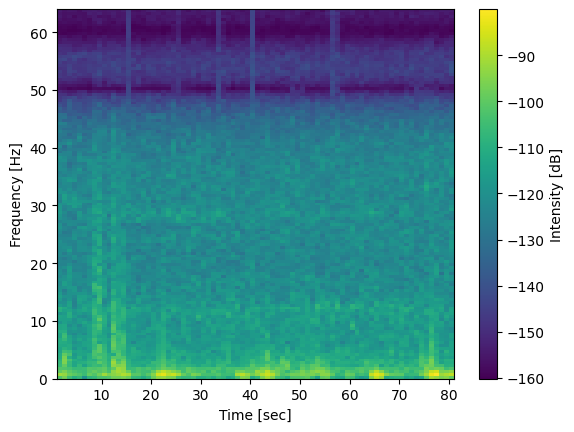

In [582]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


fs = 128  
window = 'hann'  
nperseg = 256 
noverlap = 128  

frequencies_l, times_l, Sxx_l = spectrogram(left_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
print(f"Shape of Sxx: {Sxx_l.shape}")
print(f"Length of times: {len(times_l)}")
print(f"Length of frequencies: {len(frequencies_l)}")
Sxx_l[Sxx_l == 0] = 1e-15  

plt.pcolormesh(times_l, frequencies_l, 10 * np.log10(Sxx_l[:, :-1, :-1].mean(axis=0)))  
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()

In [583]:

mean_spectrogram = np.mean(Sxx_l, axis=1)
variance_spectrogram = np.var(Sxx_l, axis=1)  
max_spectrogram = np.max(Sxx_l, axis=1) 

left_spectrogram_features = np.column_stack((mean_spectrogram, variance_spectrogram, max_spectrogram))


Shape of Sxx: (15, 129, 126)
Length of times: 126
Length of frequencies: 129


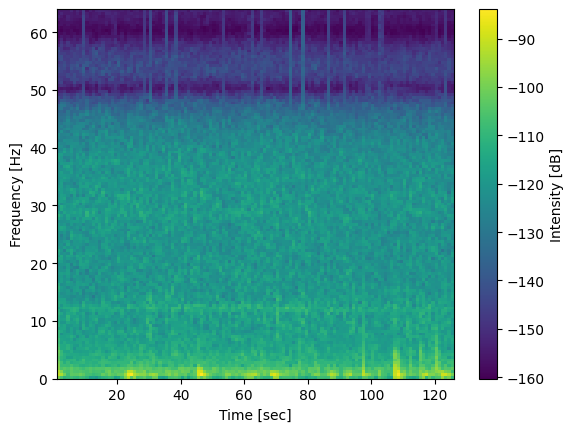

In [584]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


fs = 128  
window = 'hann'  
nperseg = 256 
noverlap = 128  

frequencies_r, times_r, Sxx_r = spectrogram(right_data, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)
print(f"Shape of Sxx: {Sxx_r.shape}")
print(f"Length of times: {len(times_r)}")
print(f"Length of frequencies: {len(frequencies_r)}")
Sxx_r[Sxx_r == 0] = 1e-15  

plt.pcolormesh(times_r, frequencies_r, 10 * np.log10(Sxx_r[:, :-1, :-1].mean(axis=0)))  
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()

In [585]:
mean_spectrogram = np.mean(Sxx_r, axis=1)
variance_spectrogram = np.var(Sxx_r, axis=1)  
max_spectrogram = np.max(Sxx_r, axis=1) 

right_spectrogram_features = np.column_stack((mean_spectrogram, variance_spectrogram, max_spectrogram))

In [586]:
print(left_psd_features_np.shape)
# print(wavelet_coeffs_all_channels.shape)
print(left_statistics.shape)
print(left_spectrogram_features.shape)

(15, 129)
(15, 6)
(15, 243)


ab left aur right ke features ko left feature and right feature overall me concatenate kia aur finally left aur right overall ko bhi concatenate krke finnal features bna lie

In [587]:
# import numpy as np

# left_psd_features = np.random.rand(15, 6)  
# wavelet_coeffs_all_channels = np.random.rand(15, 10)  
# left_statistics = np.random.rand(15, 4)  
# left_spectrogram_features = np.random.rand(15, 8)  

# print(left_psd_features.shape)
# print(wavelet_coeffs_all_channels.shape)
# print(left_statistics.shape)
# print(left_spectrogram_features.shape)

left_features = np.concatenate((
    left_psd_features,
    coefficients_array_left,
    coefficients_array_left_second,
    coefficients_array_left_third,
    coefficients_array_left_fourth,
    coefficients_array_left_fifth,
    left_statistics,
    left_spectrogram_features
), axis=1)

# print(left_features.shape)


In [588]:
right_features = np.concatenate((
    right_psd_features,
    coefficients_array_right,
    coefficients_array_right_second,
    coefficients_array_right_third,
    coefficients_array_right_fourth,
    coefficients_array_right_fifth,
    right_statistics,
    right_spectrogram_features
), axis=1)


In [589]:
min_num_columns = min(left_features.shape[1], right_features.shape[1])
left_features_trimmed = left_features[:, :min_num_columns]
right_features_trimmed = right_features[:, :min_num_columns]

all_features = np.concatenate((left_features_trimmed, right_features_trimmed), axis=0)

labels = [0] * left_features_trimmed.shape[0] + [1] * right_features_trimmed.shape[0]

ab features hai label bhi hai model me daal die

In [590]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

X_train, X_test, y_train, y_test = train_test_split(all_features, labels, test_size=0.2, random_state=42)

print(f"NaN in training data: {any([any(map(lambda x: isinstance(x, float) and np.isnan(x), row)) for row in X_train])}")
print(f"NaN in testing data: {any([any(map(lambda x: isinstance(x, float) and np.isnan(x), row)) for row in X_test])}")

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

rf_classifier.fit(X_train_imputed, y_train)


X_test_imputed = imputer.transform(X_test)

predictions = rf_classifier.predict(X_test_imputed)

accuracy = accuracy_score(y_test, predictions)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

report = classification_report(y_test, predictions)
print("Random Forest Classification Report:\n", report)




NaN in training data: True
NaN in testing data: False
Random Forest Accuracy: 100.00%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [591]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_classifier.fit(X_train_imputed, y_train)

predictions_logistic = logistic_classifier.predict(X_test_imputed)

accuracy_logistic = accuracy_score(y_test, predictions_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%")

report_logistic = classification_report(y_test, predictions_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Logistic Regression Accuracy: 83.33%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [592]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_imputed, y_train)

predictions_knn = knn_classifier.predict(X_test_imputed)

accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

report_knn = classification_report(y_test, predictions_knn)
print("KNN Classification Report:\n", report_knn)


KNN Accuracy: 100.00%
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [593]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_imputed, y_train)

predictions_svm = svm_classifier.predict(X_test_imputed)

accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

report_svm = classification_report(y_test, predictions_svm)
print("SVM Classification Report:\n", report_svm)


SVM Accuracy: 83.33%
SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [594]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_imputed, y_train)

predictions_gb = gb_classifier.predict(X_test_imputed)

accuracy_gb = accuracy_score(y_test, predictions_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")

report_gb = classification_report(y_test, predictions_gb)
print("Gradient Boosting Classification Report:\n", report_gb)



Gradient Boosting Accuracy: 83.33%
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [595]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_imputed, y_train)

predictions_knn = knn_classifier.predict(X_test_imputed)

accuracy_knn = accuracy_score(y_test, predictions_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

report_knn = classification_report(y_test, predictions_knn)
print("KNN Classification Report:\n", report_knn)


KNN Accuracy: 83.33%
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [596]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_imputed, y_train)

predictions_dt = dt_classifier.predict(X_test_imputed)

accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

report_dt = classification_report(y_test, predictions_dt)
print("Decision Tree Classification Report:\n", report_dt)


Decision Tree Accuracy: 83.33%
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [597]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_imputed, y_train)

predictions_logreg = logreg_classifier.predict(X_test_imputed)

accuracy_logreg = accuracy_score(y_test, predictions_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")

report_logreg = classification_report(y_test, predictions_logreg)
print("Logistic Regression Classification Report:\n", report_logreg)



Logistic Regression Accuracy: 83.33%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.80      1.00      0.89         4

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [598]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np


X_train_imputed = np.array(X_train_imputed)
y_train = np.array(y_train)
X_test_imputed = np.array(X_test_imputed)
y_test = np.array(y_test)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_imputed.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_imputed, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_imputed, y_test)
print(f"Neural Network Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10
1/1 [==============================] - 0s 450ms/step - loss: 0.7057 - accuracy: 0.5263 - val_loss: 0.6973 - val_accuracy: 0.2000
Epoch 2/10
1/1 [==============================] - 0s 19ms/step - loss: 0.6912 - accuracy: 0.6316 - val_loss: 0.6905 - val_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6726 - accuracy: 0.7368 - val_loss: 0.6841 - val_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6648 - accuracy: 0.7368 - val_loss: 0.6789 - val_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6484 - accuracy: 0.8947 - val_loss: 0.6740 - val_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6356 - accuracy: 0.8421 - val_loss: 0.6696 - val_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 20ms/step - loss: 0.6170 - accuracy: 0.8421 - val_loss: 0.6647 - val_accuracy: 0.6000
Epoch 8/10
1/1 [==========